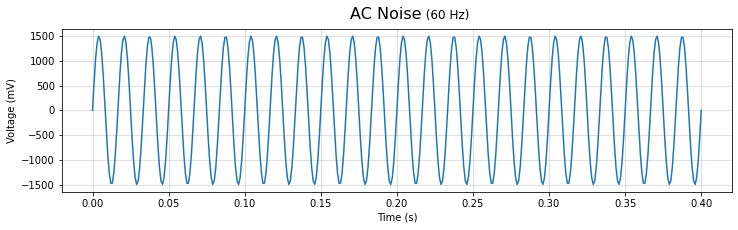

In [9]:
import math
import numpy as np
from matplotlib import pyplot as plt

start = 0
end = 0.4
dn = 401  # !!sampling rate : 1000 Hz

x = np.linspace(start,end,dn)
noi_data = 2200*np.sin(x*math.pi*2*60)  # 교류 전원 노이즈 (60 Hz)
plt.figure(figsize=(12,3))
plt.suptitle('AC Noise',size=16)
plt.title('                          (60 Hz)',pad=10)
plt.xlabel('Time (s)')
plt.ylabel('Voltage (mV)')
plt.grid(which='both',axis='both',alpha=0.5)
plt.plot(x,noi_data);

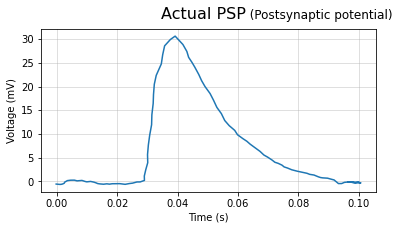

In [10]:
import csv  # psp 가정
f = open("C:/Users/enjdn/Documents/MEG_python/MEG_data_artifi/psp5.csv","rt")
reader = csv.reader(f)

col1 = []
col2 = []
for row in reader:
    col1.append(row[0])
    col2.append(row[1])

del col1[0]
del col2[0]

len(col1)

time = np.array(list(map(float, col1)))
volt = np.array(list(map(float, col2)))
plt.figure(figsize=(6, 3))  # 실제 psp 그래프
plt.suptitle('Actual PSP',size=16)
plt.title('                                                          (Postsynaptic potential)',pad=10)
plt.xlabel('Time (s)')
plt.ylabel('Voltage (mV)')
plt.grid(which='major',axis='both',alpha=0.5)
plt.plot(time,volt);

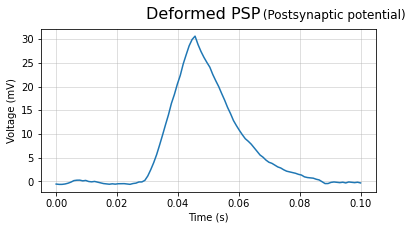

In [11]:
n = 104
x_2 = np.linspace(0,0.1,n)  # scale 조정을 위해 변형된 psp 그래프
plt.figure(figsize=(6, 3))
plt.suptitle('Deformed PSP',size=16)
plt.title('                                                                 (Postsynaptic potential)',pad=10)
plt.xlabel('Time (s)')
plt.ylabel('Voltage (mV)')
plt.grid(which='major',axis='both',alpha=0.5)
plt.plot(x_2,volt);

401

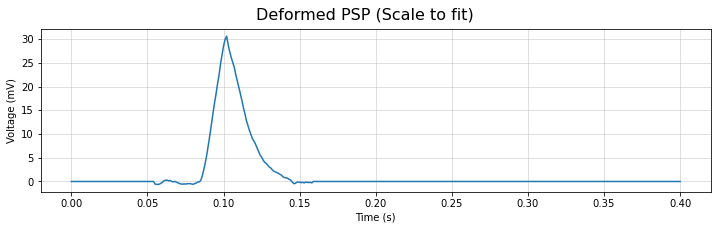

In [12]:
c = np.zeros(shape=(55,), dtype=np.int8)  # signal 0.01 s 로 
volt_1 = np.concatenate((c, volt), axis=None)
d = np.zeros(shape=(242,), dtype=np.int8)
volt_2 = np.concatenate((volt_1, d), axis=None)

plt.figure(figsize=(12,3))
plt.suptitle('Deformed PSP (Scale to fit)',size=16)
plt.xlabel('Time (s)')
plt.ylabel('Voltage (mV)')
plt.grid(which='major',axis='both',alpha=0.5)
plt.plot(x,volt_2);  # noise와 scale 맞추기
len(volt_2)

In [13]:
# Biot-Savart Law에 따른 signal 자기장

n,m = 9, 9
sensor_array = np.zeros((n,m), dtype = np.ndarray)  # n X m 채널 sensor의 위치
for i in range(n):
    for j in range(m):
        sensor_array[i,j] = np.array([4*(i-(n-1)/2),4*(j-(m-1)/2),4])  # [0,0]으로 위치 세팅 & 채널 간격 4cm

sig = np.array([1,1,0])  # signal의 방향 및 크기 (4 cm 로 가정)
noi_20 = np.array([0,20000,4])  # noise의 위치(20 m로 가정)  


dl_vec_sig = sig/np.linalg.norm(sig)  # signal의 단위 벡터

R_sig = np.zeros((n,m), dtype = np.ndarray)  # 각각의 sensor 채널과 signal이 떨어진 거리 R
for i in range(n):
    for j in range(m):
        R_sig[i,j] = np.linalg.norm(sensor_array[i,j])

a_R_sig = sensor_array/R_sig  # 각각의 sensor 채널을 향하는 R의 단위벡터 a_R

H_vec_sig = np.zeros((n,m), dtype = np.ndarray)  # 각각의 sensor에 들어오는 signal 벡터의 크기
for i in range(n):
    for j in range(m):
        H_vec_sig[i,j] = np.cross(dl_vec_sig,a_R_sig[i,j])


H_sig = np.zeros((n,m), dtype = np.ndarray)  # 각각의 sensor에 들어오는 최종 signal의 자기장 (with Biot-Savart Law) 
for i in range(n):
    for j in range(m):
        g_noise = np.random.randn(401)  # 가우시안 noise 생성 
        H_sig[i,j]  = (float(H_vec_sig[i,j][2])/((4*np.pi)*float(R_sig[i,j])**2))*volt_2 + g_noise*0.001
      
    
R_noi_20 = np.zeros((n,m), dtype = np.ndarray)  # 각각의 sensor 채널과 noise가 떨어진 거리 R (20 m)
for i in range(n):
    for j in range(m):
        R_noi_20[i,j] = np.linalg.norm(sensor_array[i,j]-noi_20)

H_noi_20 = np.zeros((n,m), dtype = np.ndarray)  # 각각의 sensor에 들어오는 최종 noise의 자기장 (with Biot-Savart Law) (20 m)
for i in range(n):
    for j in range(m):
        H_noi_20[i,j] = noi_data/(2*np.pi*R_noi_20[i,j])

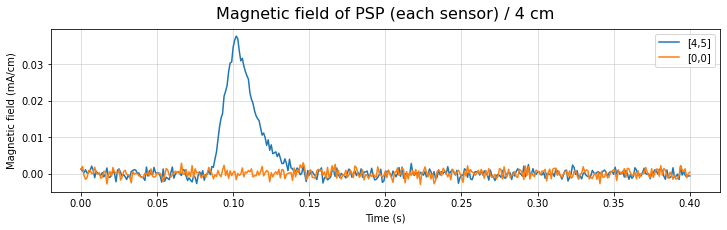

In [14]:
plt.figure(figsize=(12, 3)) # Sensor에 들어오는 최종 signal의 자기장 (with Biot-Savart Law) + 각 채널에 가우시안 noise 
plt.title('Magnetic field of PSP (each sensor) / 4 cm',size=16, pad=10)
plt.xlabel('Time (s)')
plt.ylabel('Magnetic field (mA/cm)')
plt.grid(which='both',axis='both',alpha=0.5)
plt.plot(x,H_sig[4,5], label='[4,5]')  # Sensor[4,5]에서 signal
plt.plot(x,H_sig[0,0], label='[0,0]')  # Sensor[0,0]에서 signal
plt.legend();

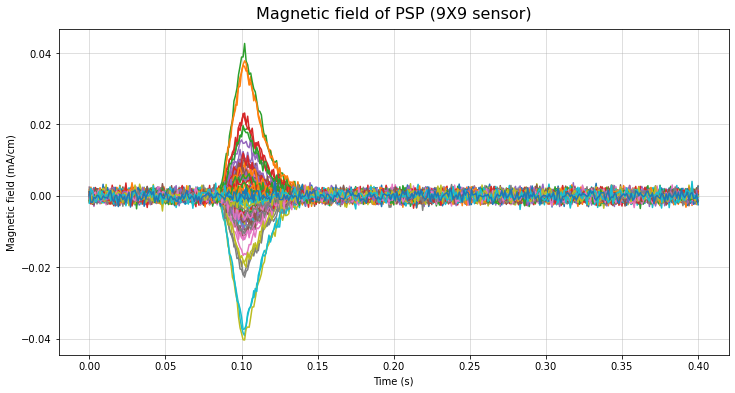

In [15]:
plt.figure(figsize=(12, 6)) # 9 X 9 Sensor에 들어오는 최종 signal의 자기장
plt.title('Magnetic field of PSP (9X9 sensor)',size=16, pad=10)
plt.xlabel('Time (s)')
plt.ylabel('Magnetic field (mA/cm)')
plt.grid(which='both',axis='both',alpha=0.5)
for i in range(n):
    for j in range(m):
        plt.plot(x,H_sig[i,j])

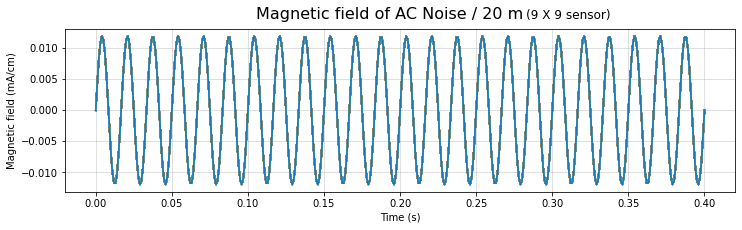

In [16]:
plt.figure(figsize=(12, 3))  # 각각의 sensor 채널과 noise가 떨어진 거리 R (20 m)
plt.suptitle('Magnetic field of AC Noise / 20 m',size=16)
plt.title('                                                                                       (9 X 9 sensor)',pad=10)
plt.xlabel('Time (s)')
plt.ylabel('Magnetic field (mA/cm)')
plt.grid(which='both',axis='both',alpha=0.5)
for i in range(n):
    for j in range(m):
        plt.plot(x,H_noi_20[i,j])

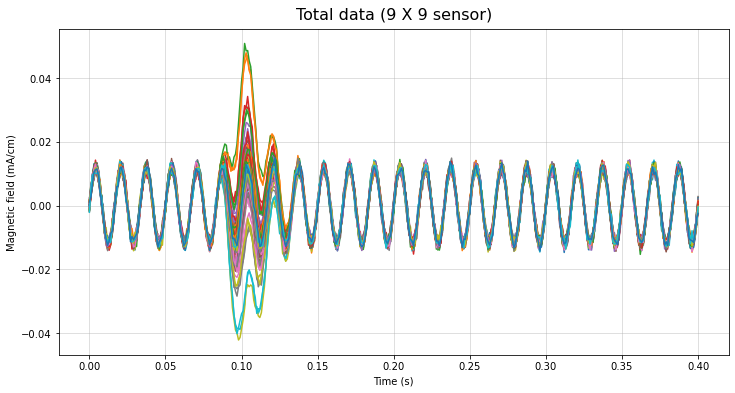

In [17]:
plt.figure(figsize=(12, 6))  # 각각의 sensor 에서 받아들인 총 데이터 (20 m)
plt.title('Total data (9 X 9 sensor)',size=16, pad=10)
plt.xlabel('Time (s)')
plt.ylabel('Magnetic field (mA/cm)')
plt.grid(which='both',axis='both',alpha=0.5)
for i in range(n):
    for j in range(m):
        plt.plot(x, H_sig[i,j] + H_noi_20[i,j])

In [18]:
H_all_f_20 = []  # 각각의 sensor 에서 받아들인 총 신호  (20 m)
for i in range(n):
    for j in range(m):
        H_all_f_20.append(list(H_sig[i,j] + H_noi_20[i,j]))
len(H_all_f_20)

81

In [19]:
import pandas as pd

# frame = pd.DataFrame(H_all_f)

start = 0
end = 0.4
dn = 401  # !!sampling rate : 1000 Hz
x = np.linspace(start,end,dn)

indexName_col = x  # Data frame에 각 센서별 데이터 기록
indexName = []
for i in range(n*m):
    indexName.append('Sensor_'+str(i+1))
df = pd.DataFrame(H_all_f_20, columns = indexName_col,index = indexName)
df

,0.000,0.001,0.002,0.003,0.004,0.005,0.006,0.007,0.008,0.009,...,0.391,0.392,0.393,0.394,0.395,0.396,0.397,0.398,0.399,0.400
Sensor_1,0.001299,0.006344,0.007634,0.009215,0.010829,0.012181,0.010134,0.005731,0.001655,-0.001223,...,0.001464,-0.002868,-0.006328,-0.006956,-0.010259,-0.011398,-0.009453,-0.009289,-0.004421,0.000368
Sensor_2,-0.001870,0.003825,0.007910,0.010799,0.011656,0.011513,0.010543,0.005939,0.001600,-0.004119,...,0.002672,-0.001394,-0.006770,-0.010312,-0.011617,-0.014579,-0.012262,-0.007958,-0.004641,0.000104
Sensor_3,0.000213,0.004500,0.007501,0.010651,0.012217,0.011531,0.008455,0.004659,0.002690,-0.003122,...,0.001655,-0.000703,-0.005146,-0.009464,-0.011723,-0.011543,-0.009073,-0.006320,-0.005677,0.002166
Sensor_4,-0.000241,0.004633,0.009045,0.010065,0.012034,0.009887,0.009828,0.004166,0.002180,-0.002264,...,0.002847,-0.001416,-0.007188,-0.008460,-0.009686,-0.011867,-0.010934,-0.008117,-0.004779,0.001165
Sensor_5,-0.001601,0.004467,0.008918,0.010866,0.012376,0.010975,0.010269,0.005613,0.002226,-0.000953,...,0.001242,-0.000209,-0.006510,-0.010024,-0.009844,-0.011509,-0.011337,-0.008058,-0.005157,0.000119
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Sensor_77,0.000734,0.004310,0.008462,0.011501,0.013002,0.010157,0.009258,0.005275,0.000187,-0.002588,...,0.003174,-0.001662,-0.006463,-0.009558,-0.011508,-0.011195,-0.010044,-0.007848,-0.004025,-0.000624
Sensor_78,0.000378,0.003918,0.007559,0.010670,0.011316,0.011276,0.009617,0.006388,0.001913,-0.002315,...,0.003648,-0.003162,-0.004508,-0.009832,-0.011916,-0.011768,-0.010674,-0.008530,-0.005365,-0.001042
Sensor_79,0.001246,0.004531,0.006076,0.009408,0.011857,0.011715,0.008202,0.006939,0.001131,-0.003239,...,0.001920,-0.002519,-0.005057,-0.009290,-0.009474,-0.012644,-0.010716,-0.009591,-0.004967,-0.000164
Sensor_80,-0.002073,0.005409,0.009682,0.010147,0.010227,0.010037,0.010331,0.004458,0.002706,-0.002482,...,0.001728,0.000151,-0.004382,-0.007975,-0.011878,-0.007851,-0.011630,-0.007935,-0.005477,-0.000439


In [20]:
from sklearn.preprocessing import StandardScaler
for i in range(401):
    indexName_col[i] = indexName_col[i]
time = indexName_col

Sensor_x = df.loc[:,time].values
    
x_std = StandardScaler().fit_transform(Sensor_x.T)
x_std.shape

(401, 81)

In [21]:
time_f = x_std.T
covariance_matrix = np.cov(time_f)
# np.set_printoptions(threshold=np.inf,linewidth=np.inf)  # '...' 생략 없이 출력
covariance_matrix.shape

(81, 81)

In [22]:
eig_vals, eig_vecs = np.linalg.eig(covariance_matrix)

In [23]:
# 주성분별 데이터를 설명하는 정도 (10000% 기준)

print('PC1 = ',round(float(eig_vals[0]/sum(eig_vals))*10000,2),'%')
print('PC2 = ',round(float(eig_vals[1]/sum(eig_vals))*10000,2),'%')
print('PC3 = ',round(float(eig_vals[2]/sum(eig_vals))*10000,2),'%')
print('PC4 = ',round(float(eig_vals[3]/sum(eig_vals))*10000,2),'%')

PC1 =  9253.56 %
PC2 =  620.13 %
PC3 =  3.28 %
PC4 =  3.17 %


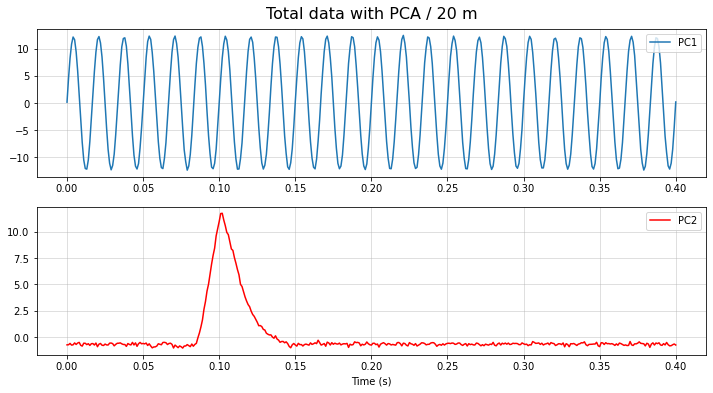

In [24]:
plt.figure(figsize=(12,6)) 
plt.subplot(2,1,1)
plt.title('Total data with PCA / 20 m',size=16, pad=10)
plt.grid(which='both',axis='both',alpha=0.5)
x_pc1 = x_std.dot(eig_vecs.T[0])
plt.plot(time,x_pc1.T,label='PC1')
plt.legend(loc='upper right')

plt.subplot(2,1,2)
plt.xlabel('Time (s)')
plt.grid(which='both',axis='both',alpha=0.5)
x_pc2 = x_std.dot(eig_vecs.T[1])
plt.plot(time,x_pc2.T, color='red',label='PC2')
plt.legend(loc='upper right');

In [26]:
eig_vals

array([7.51412423e+01, 5.03559379e+00, 2.66295136e-02, 2.57484824e-02,
       2.49935062e-02, 2.50030242e-02, 2.41355947e-02, 2.37788466e-02,
       2.26847165e-02, 2.22542478e-02, 2.16159645e-02, 2.13871914e-02,
       2.12121018e-02, 2.03310717e-02, 1.95586322e-02, 1.96404231e-02,
       1.87745028e-02, 1.86475718e-02, 1.82201035e-02, 1.77993804e-02,
       1.79936314e-02, 1.74917966e-02, 1.70129019e-02, 1.66527804e-02,
       1.63681033e-02, 1.60995154e-02, 4.06252987e-03, 4.62747817e-03,
       1.59866467e-02, 1.55004831e-02, 1.51718673e-02, 1.50300571e-02,
       1.44626983e-02, 4.96584395e-03, 5.00208833e-03, 1.43323836e-02,
       1.41205322e-02, 1.38901844e-02, 5.28777298e-03, 5.40130262e-03,
       5.42844756e-03, 1.37596921e-02, 1.34521237e-02, 5.63711875e-03,
       5.85429954e-03, 6.01457936e-03, 1.31358015e-02, 6.29065990e-03,
       1.30780477e-02, 1.30057833e-02, 1.24275189e-02, 6.72563202e-03,
       1.22527250e-02, 6.59308523e-03, 6.54804707e-03, 1.19833755e-02,
      